In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

In [3]:
import statsmodels.api as sm

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Reading data(Loading dataframe)
df = pd.read_csv('Life Expectancy Data.csv')

In [6]:
#Display all columns
pd.set_option('display.max_columns', None)

In [7]:
df.head() # Top 5 rows

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0             62     0.01               71.279624         65.0      1154   
1             64     0.01               73.523582         62.0       492   
2             66     0.01               73.219243         64.0       430   
3             69     0.01               78.184215         67.0      2787   
4             71     0.01                7.097109         68.0      3013   

    BMI   under-five deaths   Polio  Total expenditure  Diphtheria   \
0   19.1                  83    6.0               8.16         65.0   
1   18.6                  86   58.0               8.18         62.0   
2   18.1                  89   62.0               8.13         64.0   
3   17.6                  93   67.0               8.52         67.0   
4   17.2                  97   68.0               7.87         68.0   

    HIV/AIDS         GDP  Population   thinness  1-19 years  \
0        0.1  584.259210  33736494.0                   17.2   
1        0.1  612.696514    327582.0                   17.5   
2        0.1  631.744976  31731688.0                   17.7   
3        0.1  669.959000   3696958.0                   17.9   
4        0.1   63.537231   2978599.0                   18.2   

    thinness 5-9 years  Income composition of resources  Schooling  
0                 17.3                            0.479       10.1  
1                 17.5                            0.476       10.0  
2                 17.7                            0.470        9.9  
3                 18.0                            0.463        9.8  
4                 18.2                            0.454        9.5

In [8]:
df.shape

(2938, 22)

In [9]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [10]:
df.columns = df.columns.str.strip()
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [12]:
df1=df.copy()

In [13]:
df.drop(columns = ['Country','Year', 'thinness 5-9 years' ], inplace = True)

In [14]:
df.isnull().sum()

Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
Income composition of resources    167
Schooling                          163
dtype: int64

In [15]:
# Treating missing values
df.fillna(df.median(), inplace=True)

In [16]:
df.isnull().sum()

Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
Income composition of resources    0
Schooling                          0
dtype: int64

In [17]:
df['Status'].value_counts()

Developing    2426
Developed      512
Name: Status, dtype: int64

In [18]:
categorical = df.select_dtypes(include=['object'])
categorical.columns

Index(['Status'], dtype='object')

In [19]:
numeric = df.select_dtypes(include=['float64', 'int64'])
numeric.columns

Index(['Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [20]:
numeric.describe(percentiles=[0.01,0.05,0.10,0.25,0.30,0.40,0.50,0.60,0.75,0.85,0.9,0.99]).T

count          mean           std       min  \
Life expectancy                  2938.0  6.923472e+01  9.509115e+00  36.30000   
Adult Mortality                  2938.0  1.647257e+02  1.240862e+02   1.00000   
infant deaths                    2938.0  3.030395e+01  1.179265e+02   0.00000   
Alcohol                          2938.0  4.546875e+00  3.921946e+00   0.01000   
percentage expenditure           2938.0  7.382513e+02  1.987915e+03   0.00000   
Hepatitis B                      2938.0  8.302212e+01  2.299698e+01   1.00000   
Measles                          2938.0  2.419592e+03  1.146727e+04   0.00000   
BMI                              2938.0  3.838118e+01  1.993537e+01   1.00000   
under-five deaths                2938.0  4.203574e+01  1.604455e+02   0.00000   
Polio                            2938.0  8.261777e+01  2.336717e+01   3.00000   
Total expenditure                2938.0  5.924098e+00  2.400770e+00   0.37000   
Diphtheria                       2938.0  8.239312e+01  2.365556e+01   2.00000   
HIV/AIDS                         2938.0  1.742103e+00  5.077785e+00   0.10000   
GDP                              2938.0  6.611524e+03  1.329660e+04   1.68135   
Population                       2938.0  1.023085e+07  5.402242e+07  34.00000   
thinness  1-19 years             2938.0  4.821886e+00  4.397621e+00   0.10000   
Income composition of resources  2938.0  6.303618e-01  2.051396e-01   0.00000   
Schooling                        2938.0  1.200984e+01  3.265139e+00   0.00000   

                                         1%            5%           10%  \
Life expectancy                   45.600000     51.400000     54.800000   
Adult Mortality                    4.370000     13.000000     19.000000   
infant deaths                      0.000000      0.000000      0.000000   
Alcohol                            0.010000      0.010000      0.020000   
percentage expenditure             0.000000      0.000000      0.000000   
Hepatitis B                        6.000000      9.000000     55.000000   
Measles                            0.000000      0.000000      0.000000   
BMI                                2.300000      5.200000     12.170000   
under-five deaths                  0.000000      0.000000      0.000000   
Polio                              6.000000      9.000000     52.000000   
Total expenditure                  1.257400      1.988500      2.947000   
Diphtheria                         6.000000      9.000000     49.000000   
HIV/AIDS                           0.100000      0.100000      0.100000   
GDP                               24.455693     81.834917    196.492625   
Population                       813.870000  14644.150000  47255.100000   
thinness  1-19 years               0.200000      0.600000      0.800000   
Income composition of resources    0.000000      0.291000      0.394000   
Schooling                          2.900000      5.900000      7.800000   

                                           25%            30%           40%  \
Life expectancy                      63.200000      65.300000  6.870000e+01   
Adult Mortality                      74.000000      84.000000  1.220000e+02   
infant deaths                         0.000000       1.000000  1.000000e+00   
Alcohol                               1.092500       1.531000  2.668000e+00   
percentage expenditure                4.685343      10.857350  3.438753e+01   
Hepatitis B                          82.000000      86.000000  9.200000e+01   
Measles                               0.000000       0.000000  3.000000e+00   
BMI                                  19.400000      22.700000  2.990000e+01   
under-five deaths                     0.000000       1.000000  2.000000e+00   
Polio                                78.000000      83.000000  8.800000e+01   
Total expenditure                     4.370000       4.690000  5.380000e+00   
Diphtheria                           78.000000      83.000000  8.900000e+01   
HIV/AIDS                              0.1

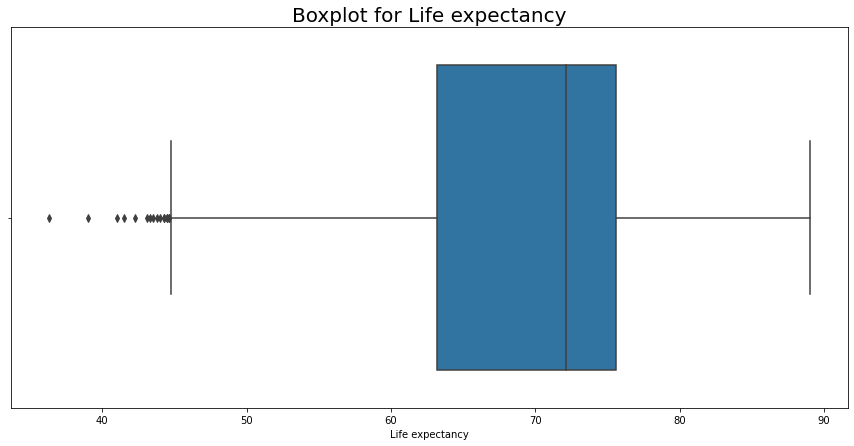

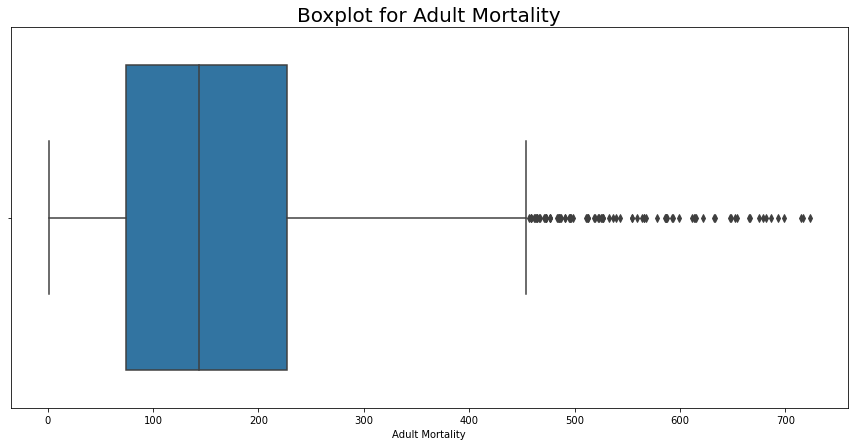

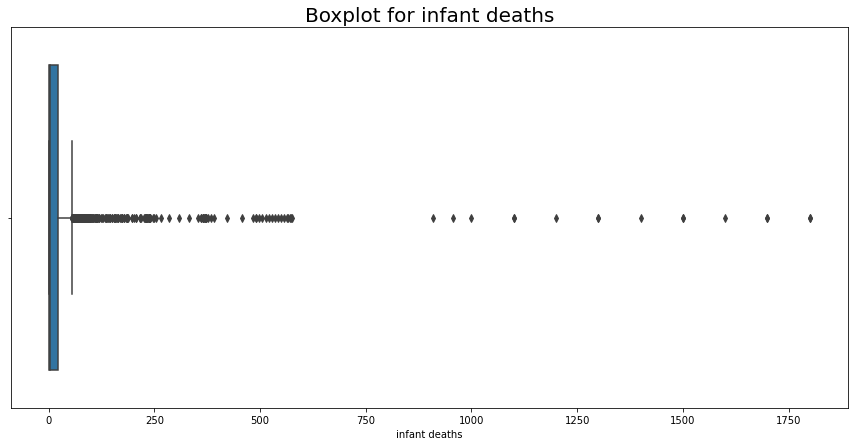

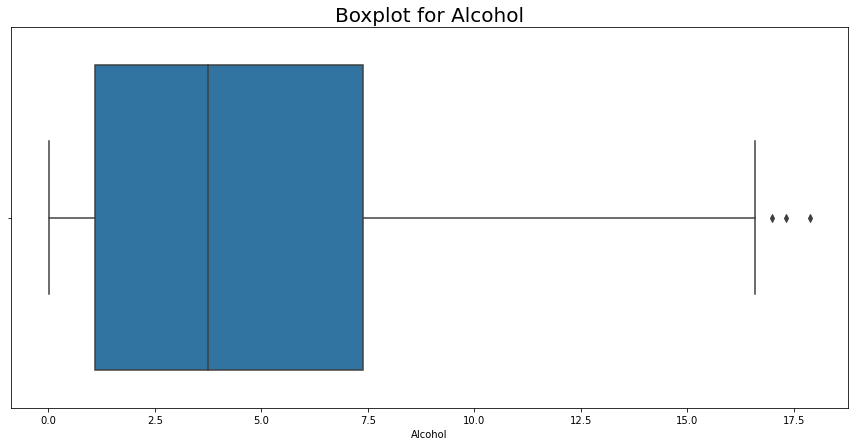

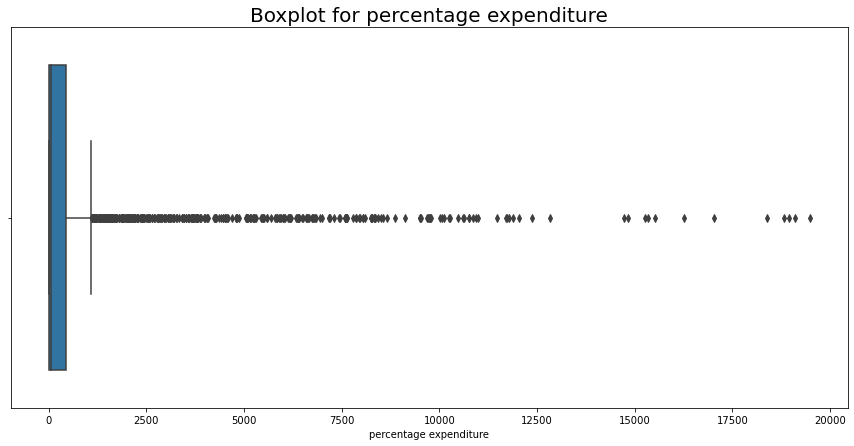

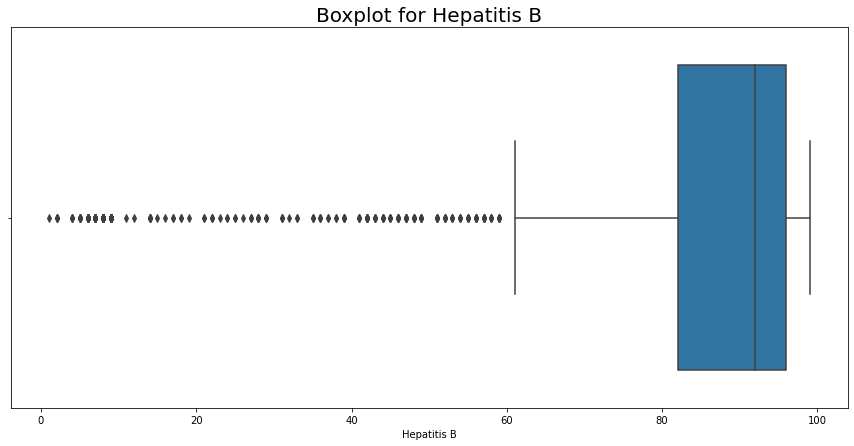

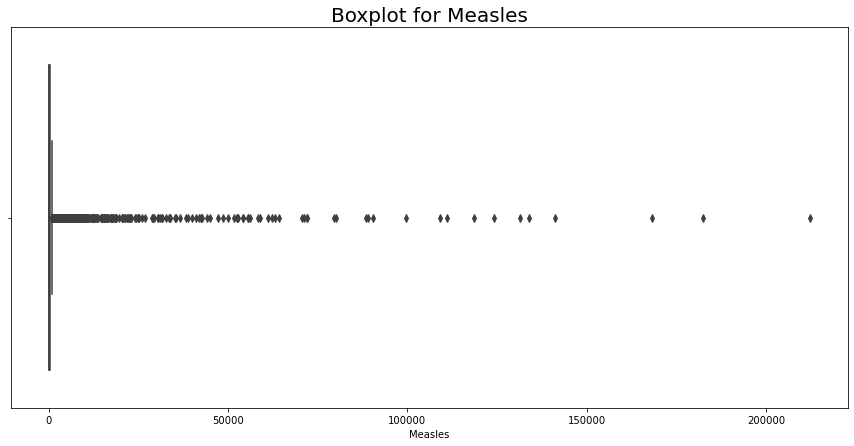

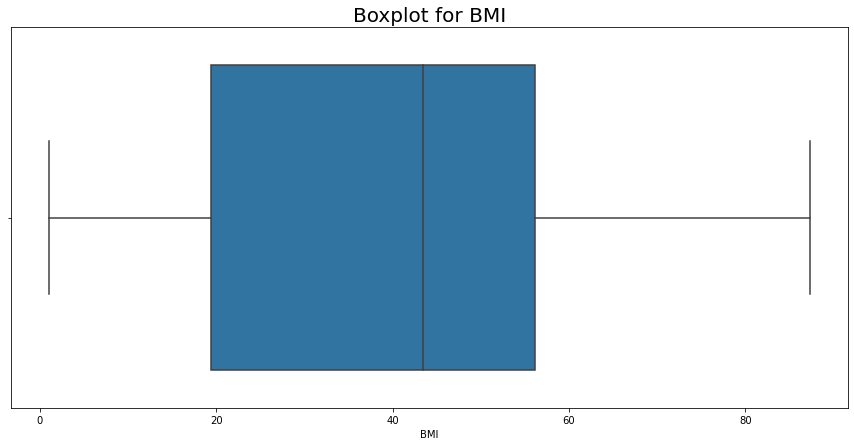

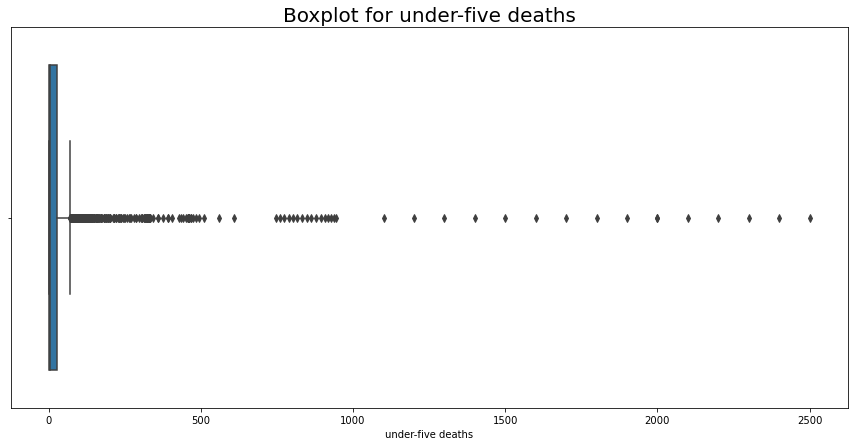

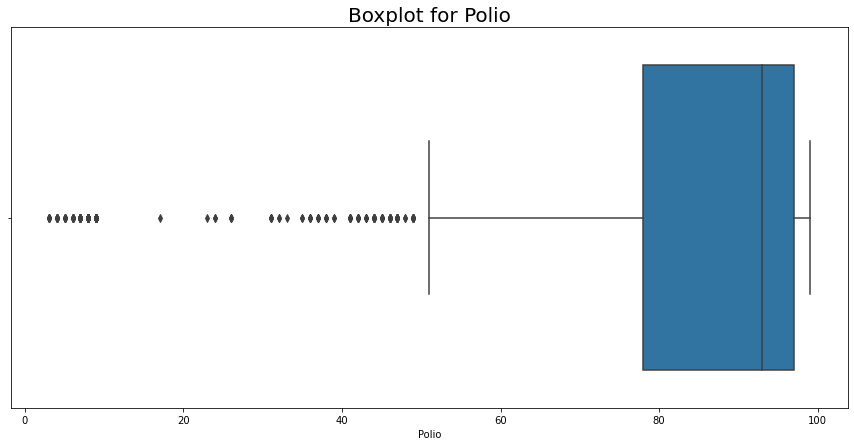

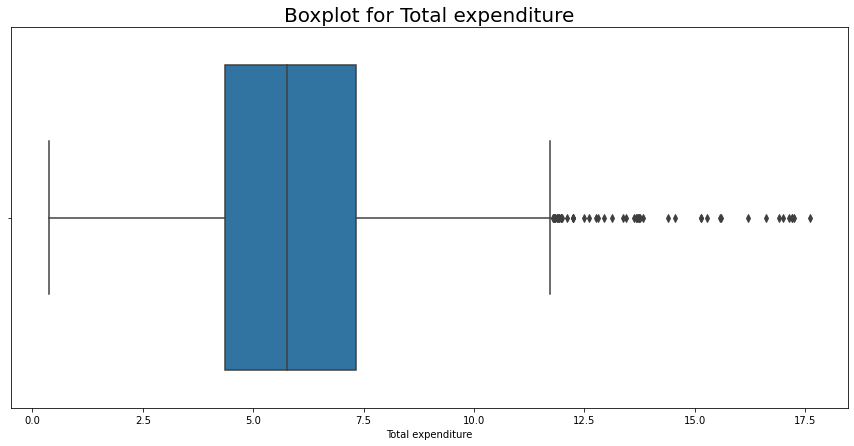

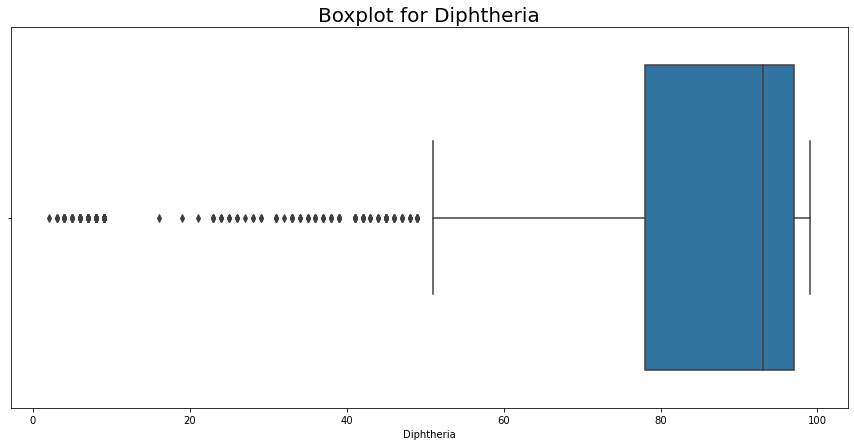

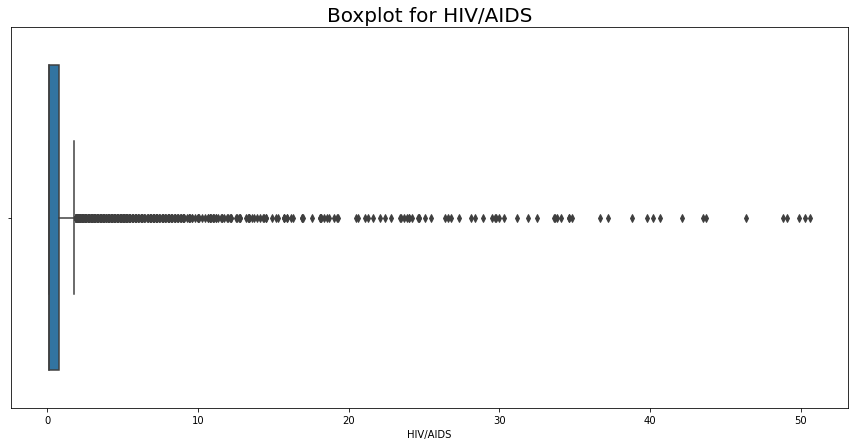

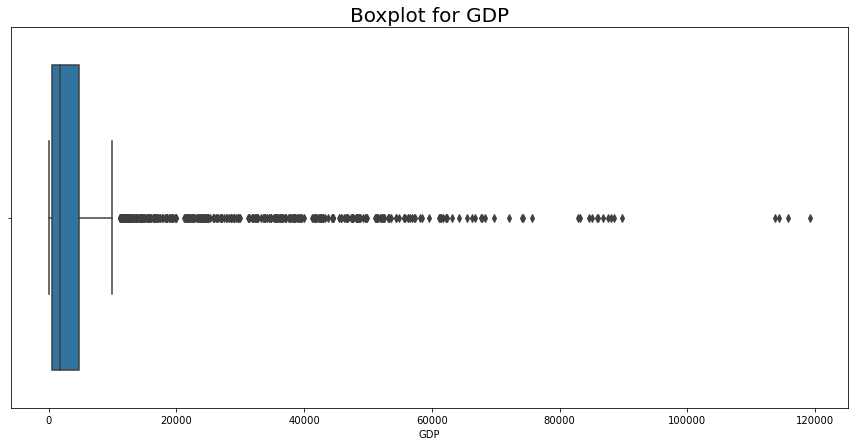

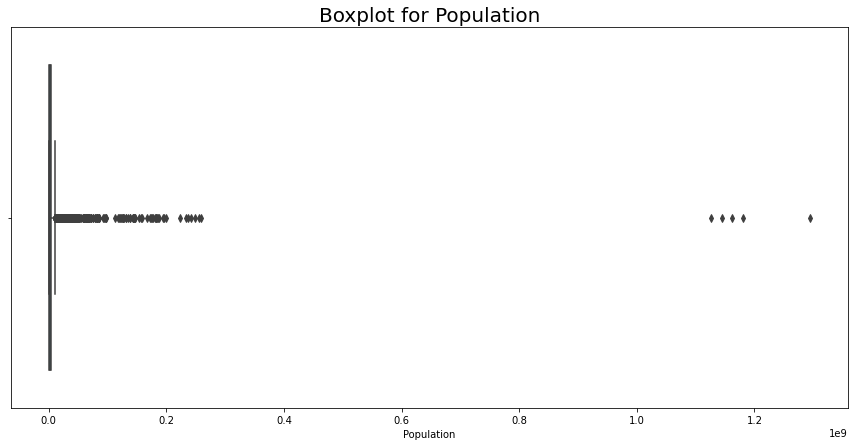

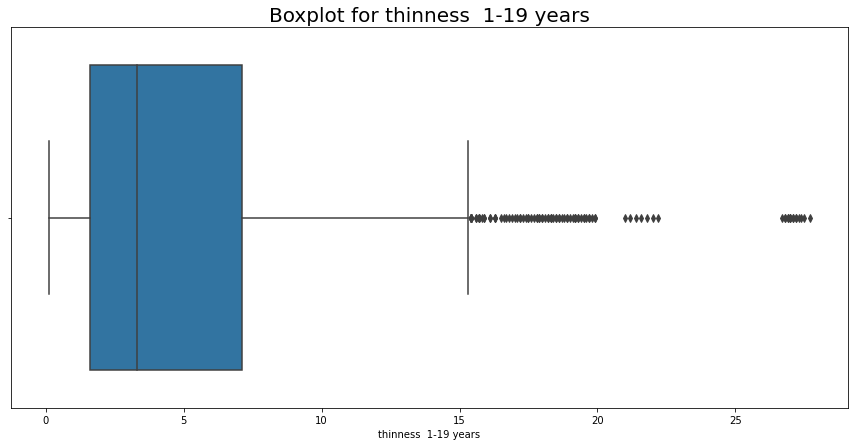

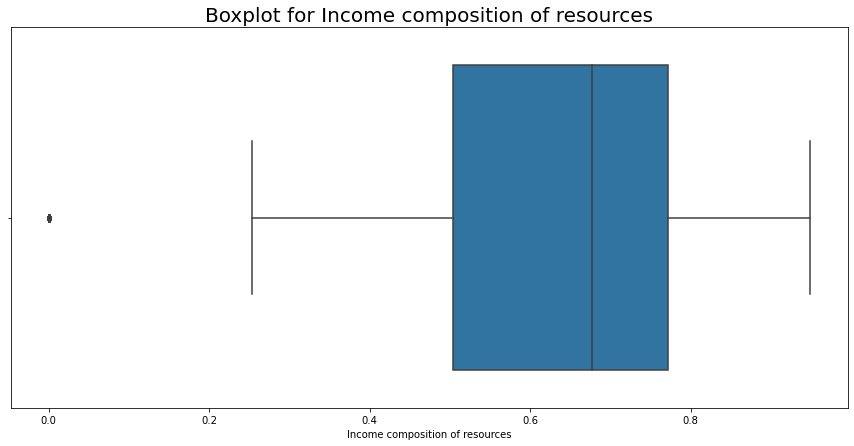

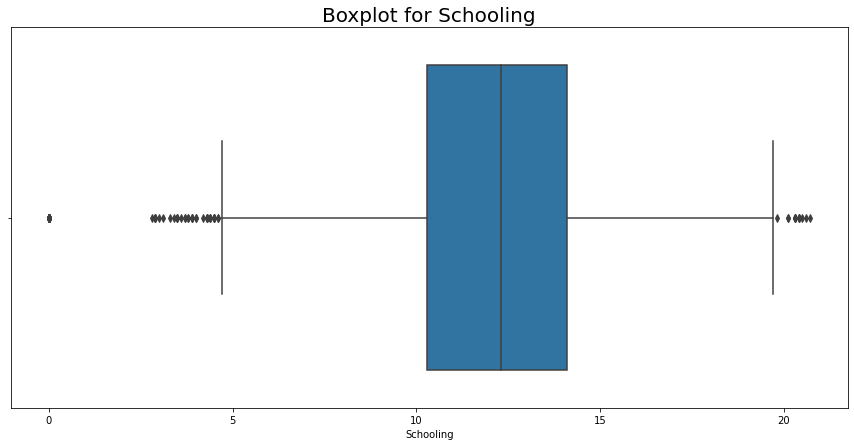

In [21]:
for cols in numeric:
    plt.figure(figsize=(15,7))  # 15 is length and 7 is breadth
    plt.title('Boxplot for '+cols,fontsize=20)
    sns.boxplot(df[cols])
    plt.show()

In [22]:
def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.01))
    x=x.clip(upper=x.quantile(0.99))
    return(x)

In [23]:
numeric=numeric.apply(lambda x : outlier_cap(x))

In [24]:
numeric.describe(percentiles=[0.01,0.05,0.10,0.25,0.30,0.40,0.50,0.60,0.75,0.85,0.9,0.99]).T 

count          mean           std  \
Life expectancy                  2938.0  6.923707e+01  9.434412e+00   
Adult Mortality                  2938.0  1.641471e+02  1.217819e+02   
infant deaths                    2938.0  2.532988e+01  6.807873e+01   
Alcohol                          2938.0  4.533468e+00  3.887282e+00   
percentage expenditure           2938.0  7.041729e+02  1.759272e+03   
Hepatitis B                      2938.0  8.303506e+01  2.295276e+01   
Measles                          2938.0  2.008056e+03  7.434980e+03   
BMI                              2938.0  3.834523e+01  1.985858e+01   
under-five deaths                2938.0  3.587767e+01  9.894806e+01   
Polio                            2938.0  8.263513e+01  2.330931e+01   
Total expenditure                2938.0  5.903351e+00  2.317144e+00   
Diphtheria                       2938.0  8.241014e+01  2.359972e+01   
HIV/AIDS                         2938.0  1.652396e+00  4.423303e+00   
GDP                              2938.0  6.419332e+03  1.220746e+04   
Population                       2938.0  8.062238e+06  2.156435e+07   
thinness  1-19 years             2938.0  4.775902e+00  4.198046e+00   
Income composition of resources  2938.0  6.302658e-01  2.049992e-01   
Schooling                        2938.0  1.203026e+01  3.156940e+00   

                                        min          1%            5%  \
Life expectancy                   45.600000   45.600000     51.400000   
Adult Mortality                    4.370000    4.603100     13.000000   
infant deaths                      0.000000    0.000000      0.000000   
Alcohol                            0.010000    0.010000      0.010000   
percentage expenditure             0.000000    0.000000      0.000000   
Hepatitis B                        6.000000    6.000000      9.000000   
Measles                            0.000000    0.000000      0.000000   
BMI                                2.300000    2.300000      5.200000   
under-five deaths                  0.000000    0.000000      0.000000   
Polio                              6.000000    6.000000      9.000000   
Total expenditure                  1.257400    1.262062      1.988500   
Diphtheria                         6.000000    6.000000      9.000000   
HIV/AIDS                           0.100000    0.100000      0.100000   
GDP                               24.455693   24.590117     81.834917   
Population                       813.870000  825.758100  14644.150000   
thinness  1-19 years               0.200000    0.200000      0.600000   
Income composition of resources    0.000000    0.000000      0.291000   
Schooling                          2.900000    2.900000      5.900000   

                                          10%            25%            30%  \
Life expectancy                     54.800000      63.200000      65.300000   
Adult Mortality                     19.000000      74.000000      84.000000   
infant deaths                        0.000000       0.000000       1.000000   
Alcohol                              0.020000       1.092500       1.531000   
percentage expenditure               0.000000       4.685343      10.857350   
Hepatitis B                         55.000000      82.000000      86.000000   
Measles                              0.000000       0.000000       0.000000   
BMI                                 12.170000      19.400000      22.700000   
under-five deaths                    0.000000       0.000000       1.000000   
Polio                               52.000000      78.000000      83.000000   
Total expenditure                    2.947000       4.370000       4.690000   
Diphtheria                          49.000000      78.000000      83.000000   
HIV/AIDS                             0.100000       0.100000       0.100000   
GDP                                196.492625     580.486996     781.689304   
Population                       47255.100000  418917.250000  673755.100000   
thinness  1-19 years            

In [25]:
corr = numeric.corr()
corr

Life expectancy  Adult Mortality  \
Life expectancy                         1.000000        -0.696901   
Adult Mortality                        -0.696901         1.000000   
infant deaths                          -0.303278         0.146245   
Alcohol                                 0.391618        -0.194692   
percentage expenditure                  0.403649        -0.259908   
Hepatitis B                             0.171879        -0.121847   
Measles                                -0.183283         0.060491   
BMI                                     0.560553        -0.384001   
under-five deaths                      -0.325664         0.161377   
Polio                                   0.459483        -0.273694   
Total expenditure                       0.213346        -0.113120   
Diphtheria                              0.473288        -0.273885   
HIV/AIDS                               -0.591739         0.541329   
GDP                                     0.448435        -0.296508   
Population                             -0.037938         0.007778   
thinness  1-19 years                   -0.487269         0.314441   
Income composition of resources         0.689796        -0.440306   
Schooling                               0.730562        -0.446742   

                                 infant deaths   Alcohol  \
Life expectancy                      -0.303278  0.391618   
Adult Mortality                       0.146245 -0.194692   
infant deaths                         1.000000 -0.150175   
Alcohol                              -0.150175  1.000000   
percentage expenditure               -0.130921  0.365087   
Hepatitis B                          -0.191854  0.090649   
Measles                               0.629920 -0.080304   
BMI                                  -0.304608  0.316501   
under-five deaths                     0.993610 -0.142172   
Polio                                -0.240723  0.212250   
Total expenditure                    -0.176372  0.304248   
Diphtheria                           -0.242493  0.212609   
HIV/AIDS                              0.076127 -0.054093   
GDP                                  -0.152716  0.326142   
Population                            0.442996  0.001757   
thinness  1-19 years                  0.390933 -0.426460   
Income composition of resources      -0.206964  0.418976   
Schooling                            -0.285945  0.511263   

                                 percentage expenditure  Hepatitis B  \
Life expectancy                                0.403649     0.171879   
Adult Mortality                               -0.259908    -0.121847   
infant deaths                                 -0.130921    -0.191854   
Alcohol                                        0.365087     0.090649   
percentage expenditure                         1.000000     0.037165   
Hepatitis B                                    0.037165     1.000000   
Measles                                       -0.071832    -0.110087   
BMI                                            0.245406     0.113653   
under-five deaths                             -0.128854    -0.194328   
Polio                                          0.154250     0.365872   
Total expenditure                              0.181226     0.061934   
Diphtheria                                     0.149699     0.450337   
HIV/AIDS                                      -0.113061    -0.087675   
GDP                                            0.904376     0.076652   
Population                                    -0.005874    -0.097088   
thinness  1-19 years                          -0.272218    -0.087211   
Income composition of resources                0.395810     0.117763   
Schooling                                      0.422161     0.147548   

                                  Measles       BMI  under-five deaths  \
Life expectancy                 -0.183283  0.560553          -0.325664   
Adult Mortality                  0.060491 -0.384001           0

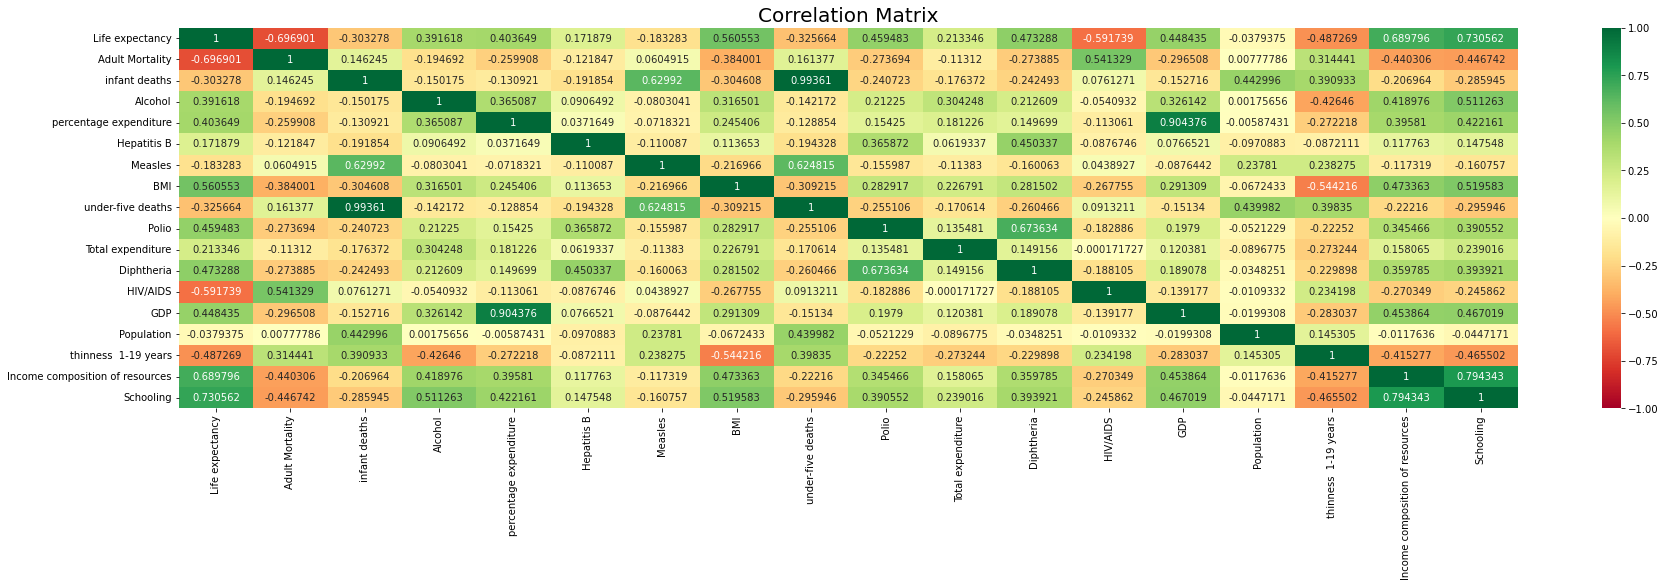

In [26]:
# Correlation Matrix Plotting
plt.figure(figsize=(30,7)) 
plt.title("Correlation Matrix", fontsize=20)
sns.heatmap(corr,cmap='RdYlGn',annot=True,vmax=1.0,vmin=-1.0,fmt='g')  
#cmap is the color for heatmap, annot=True is to show the correlation matrix value on heatmap
#vmax and vmin are the threshold for the heatmap and fmt will create a scale
plt.show()

Life expectancy has a high positive correlation with: BMI, Income composition of resources, Schooling
Life expectancy has a high negative correlation with: Adult mortality, HIV/AIDS

'infant deaths' is highly correlated with 'under-five deaths'.
Some independent variables are highly correlated

In [27]:
numeric.drop(['infant deaths'], axis=1, inplace=True)
numeric.head()

Life expectancy  Adult Mortality  Alcohol  percentage expenditure  \
0             65.0            263.0     0.01               71.279624   
1             59.9            271.0     0.01               73.523582   
2             59.9            268.0     0.01               73.219243   
3             59.5            272.0     0.01               78.184215   
4             59.2            275.0     0.01                7.097109   

   Hepatitis B  Measles   BMI  under-five deaths  Polio  Total expenditure  \
0         65.0   1154.0  19.1               83.0    6.0               8.16   
1         62.0    492.0  18.6               86.0   58.0               8.18   
2         64.0    430.0  18.1               89.0   62.0               8.13   
3         67.0   2787.0  17.6               93.0   67.0               8.52   
4         68.0   3013.0  17.2               97.0   68.0               7.87   

   Diphtheria  HIV/AIDS         GDP  Population  thinness  1-19 years  \
0        65.0       0.1  584.259210  33736494.0                  17.2   
1        62.0       0.1  612.696514    327582.0                  17.5   
2        64.0       0.1  631.744976  31731688.0                  17.7   
3        67.0       0.1  669.959000   3696958.0                  17.9   
4        68.0       0.1   63.537231   2978599.0                  18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5

<Figure size 1440x1440 with 0 Axes>

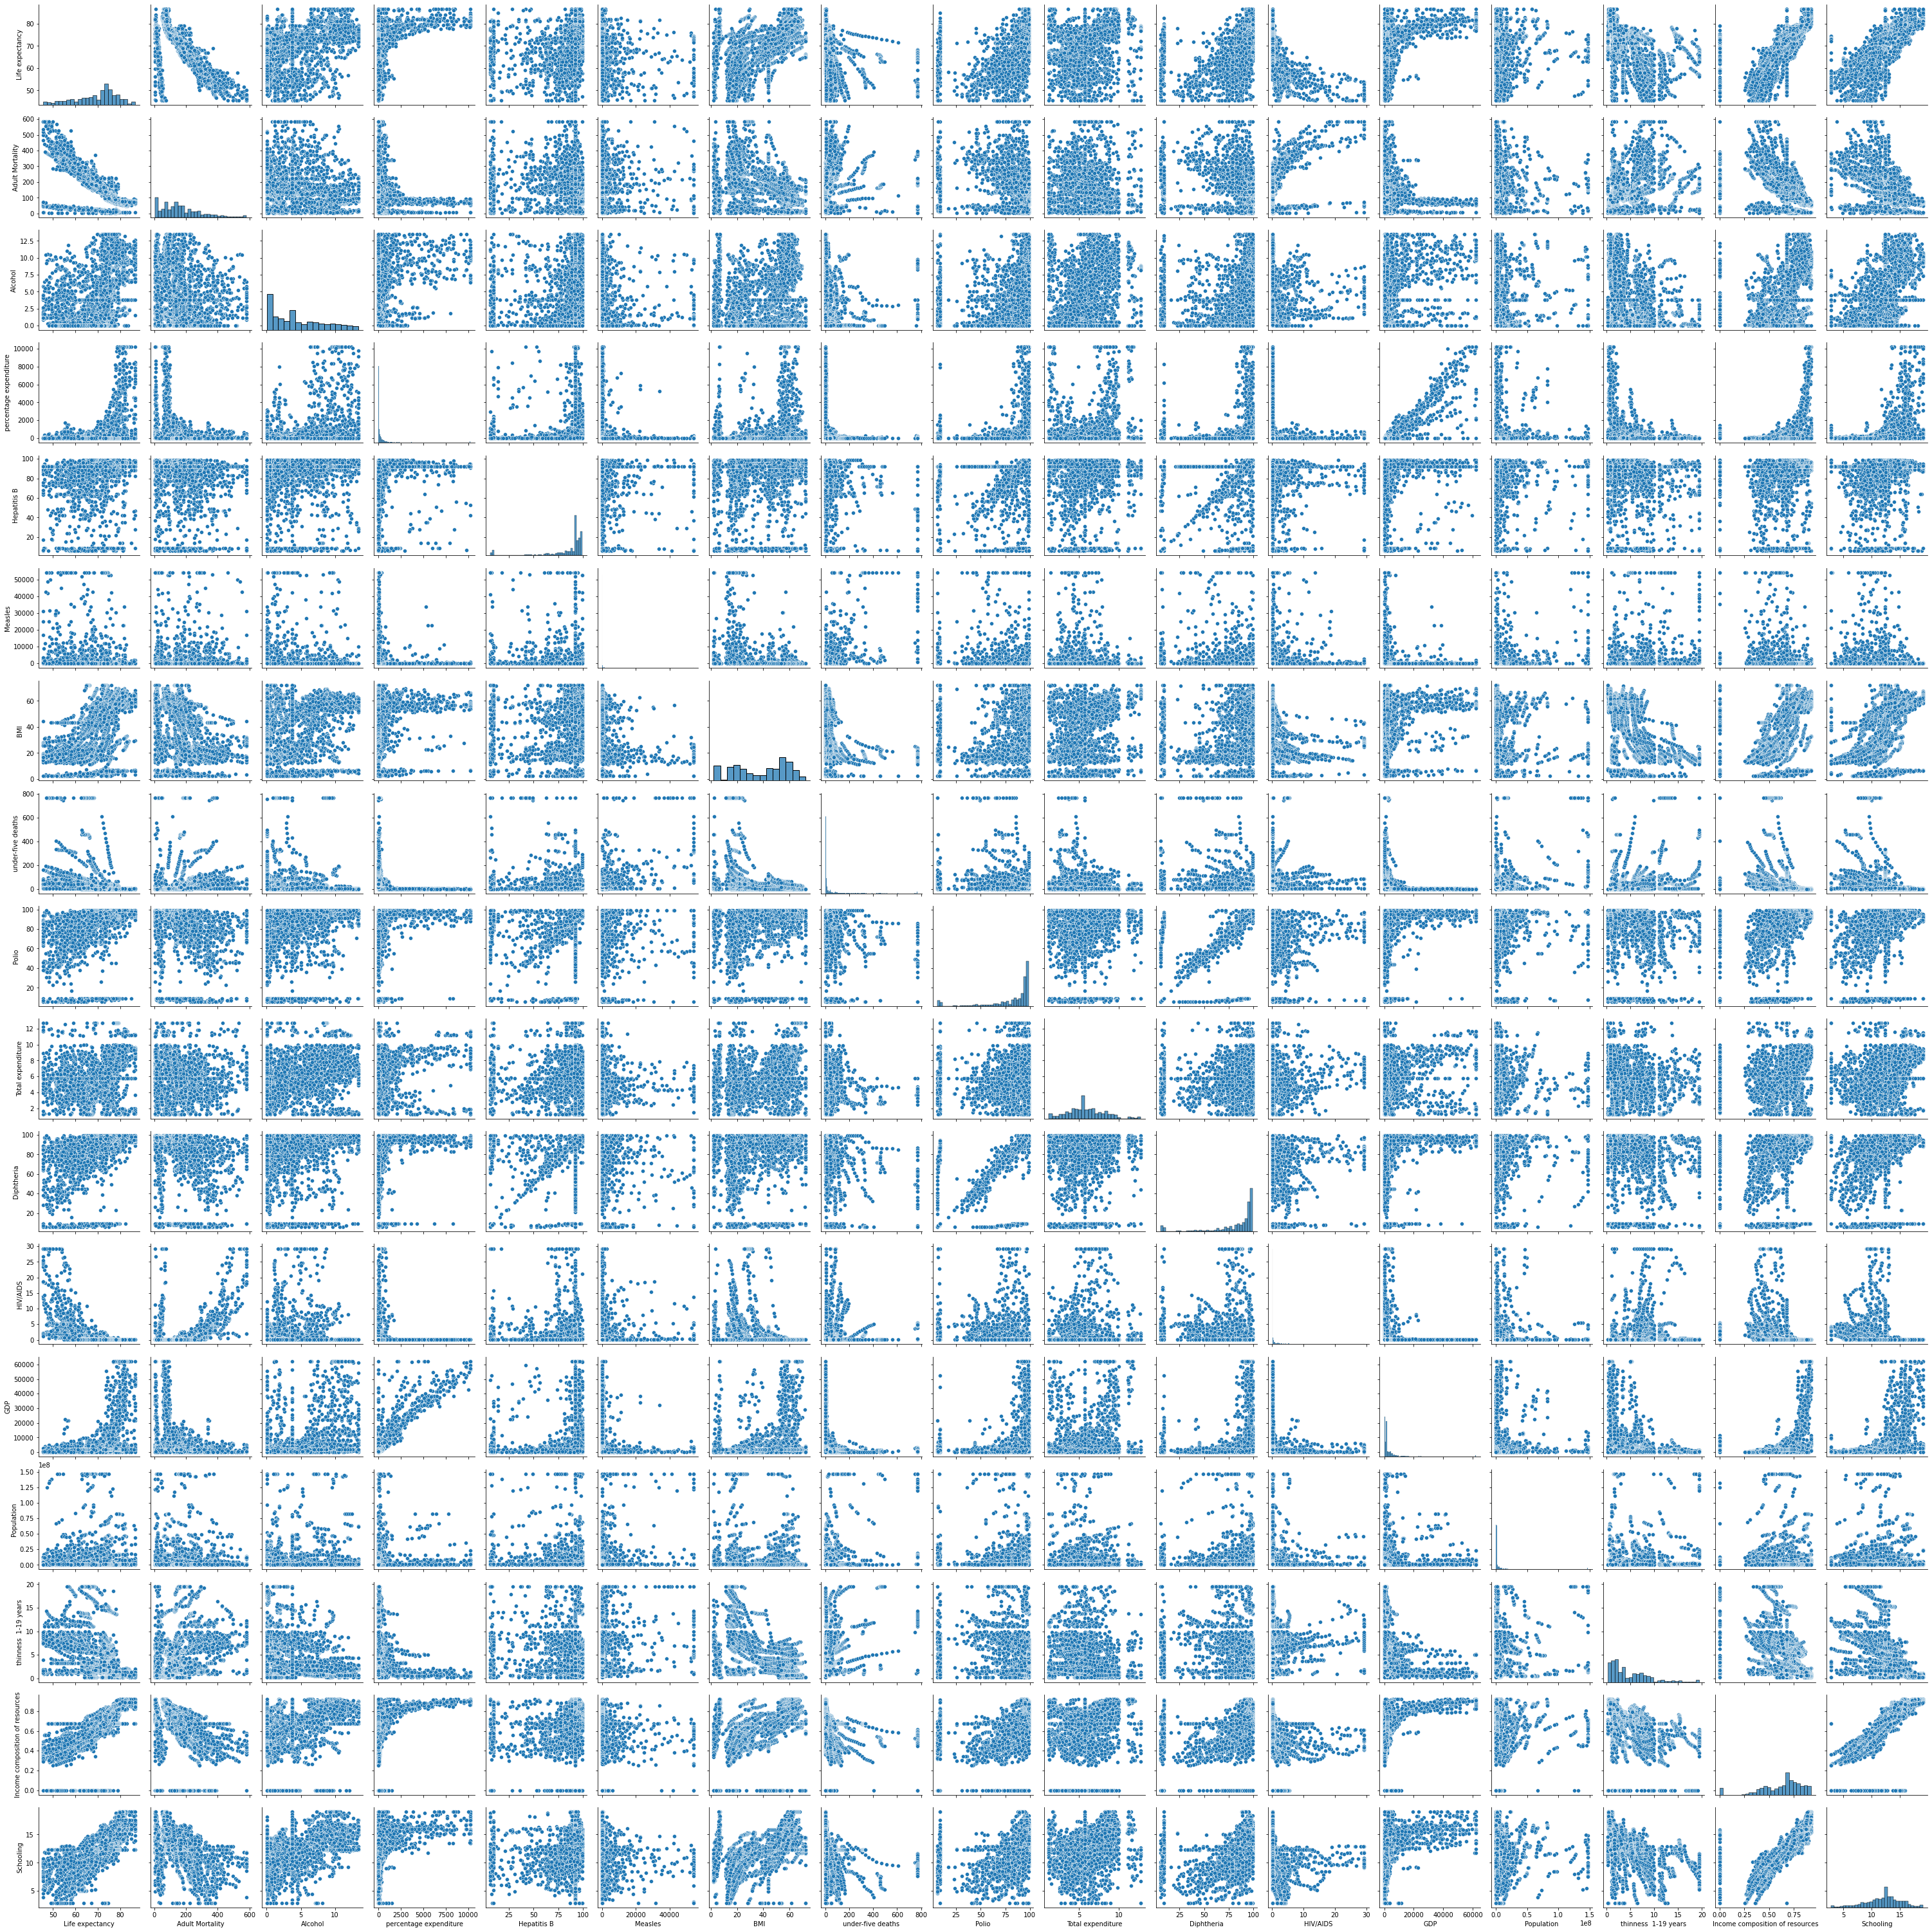

In [28]:
# pairwise scatter plot

plt.figure(figsize=(20, 20))
sns.pairplot(numeric)
plt.show()

In [29]:
numeric.columns

Index(['Life expectancy', 'Adult Mortality', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

# One Hot Encoding

In [30]:
# convert into dummies
dummies = pd.get_dummies(categorical)
dummies.head()

Status_Developed  Status_Developing
0                 0                  1
1                 0                  1
2                 0                  1
3                 0                  1
4                 0                  1

In [31]:
dummies.shape

(2938, 2)

In [32]:
X = numeric.drop(['Life expectancy'], axis=1)
y = numeric['Life expectancy']

In [33]:
X = pd.concat([X, dummies], axis=1)

In [34]:
X.shape

(2938, 18)

In [35]:
X.columns

Index(['Adult Mortality', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'Income composition of resources', 'Schooling', 'Status_Developed',
       'Status_Developing'],
      dtype='object')

In [36]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=1)

In [37]:
lr = LinearRegression()
lr.fit(X_train,y_train)   # Fit a linear model on this data set

LinearRegression()

In [41]:
# model parameters and annova
X_train_final=sm.add_constant(X_train)
model_object=sm.OLS(y_train,X_train_final)
model=model_object.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     620.8
Date:                Wed, 24 May 2023   Prob (F-statistic):               0.00
Time:                        10:25:31   Log-Likelihood:                -6149.1
No. Observations:                2203   AIC:                         1.233e+04
Df Residuals:                    2185   BIC:                         1.244e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

1. Training accuracy is 82.8%(R-squared)
2. Prob(F-statistic) less than 5% so we reject null hypothesis which is all beta coefficients are 0.
3. If P>|t| > 0.05 accept null hypothesis that beta coefficient  = 0 ie that feature is irrelevant in the model. We can drop that feature and not use it later.

In [43]:
lr_pred = lr.predict(X_test) 
lr_pred

array([79.65587788, 56.70130308, 64.58698257, 68.42364612, 44.00923971,
       82.10956044, 68.59592495, 70.99333429, 70.34166294, 76.51573481,
       74.62591732, 83.49354187, 55.42111522, 55.56263158, 76.53741565,
       63.27291439, 75.35864372, 69.69520391, 64.54902818, 50.46091448,
       72.18720887, 71.57656977, 67.16412787, 59.65881352, 72.87680808,
       80.5949656 , 78.05427089, 66.97886779, 73.31530968, 61.86003529,
       68.36449916, 53.86335899, 77.04149742, 73.35958722, 79.8688809 ,
       76.90184071, 72.885401  , 83.4511655 , 73.13437328, 71.31259206,
       69.39236673, 82.46282539, 69.52572824, 55.07849304, 73.66313868,
       73.60901603, 58.0040898 , 68.02574002, 71.8542875 , 51.68498282,
       63.21631454, 72.01463376, 71.21283137, 46.60078323, 73.13239362,
       72.75853991, 68.16734885, 75.71138078, 64.65916132, 72.06722901,
       53.69484626, 41.24103201, 61.74104468, 69.65327681, 76.61485652,
       72.03365715, 70.28938722, 66.21643732, 76.88775511, 63.99

In [44]:
r2_score(y_test,lr_pred)

0.8079206544534607

R2 score on train data is 0.82 and R2 score on test data is 0.80